# Student Performance Prediction Project

## Introduction
This project aims to predict student performance based on various features. The data used includes student profiles, academic performance, and behavioral interactions with a virtual learning environment.

## Data Cleaning and Preprocessing
The first step involves reading the dataset and inspecting its structure. Let's begin by loading the data and displaying some basic information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle


data = pd.read_csv('education.csv')

# Display the first few rows and information about the dataset
data_head = data.head()
data_info = data.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

(  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
 0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
 1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
 2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
 3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
 4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
 
   Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
 0        F   Father           15                16                  2   
 1        F   Father           20                20                  3   
 2        F   Father           10                 7                  0   
 3        F   Father           30                25                  5   
 4        F   Father           40                50                 12   
 
    Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
 0          20                   Yes       

## Dataset Description
The dataset contains 480 entries and 17 columns. Each entry represents a student, and the columns represent various attributes related to the student's education, such as gender, nationality, stage, grade, etc.

Numerical Columns: 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'
Categorical Columns: 'gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays'
Target Column: 'Class'
There are no null values in any of the columns, which is a good starting point.

## Exploratory Data Analysis

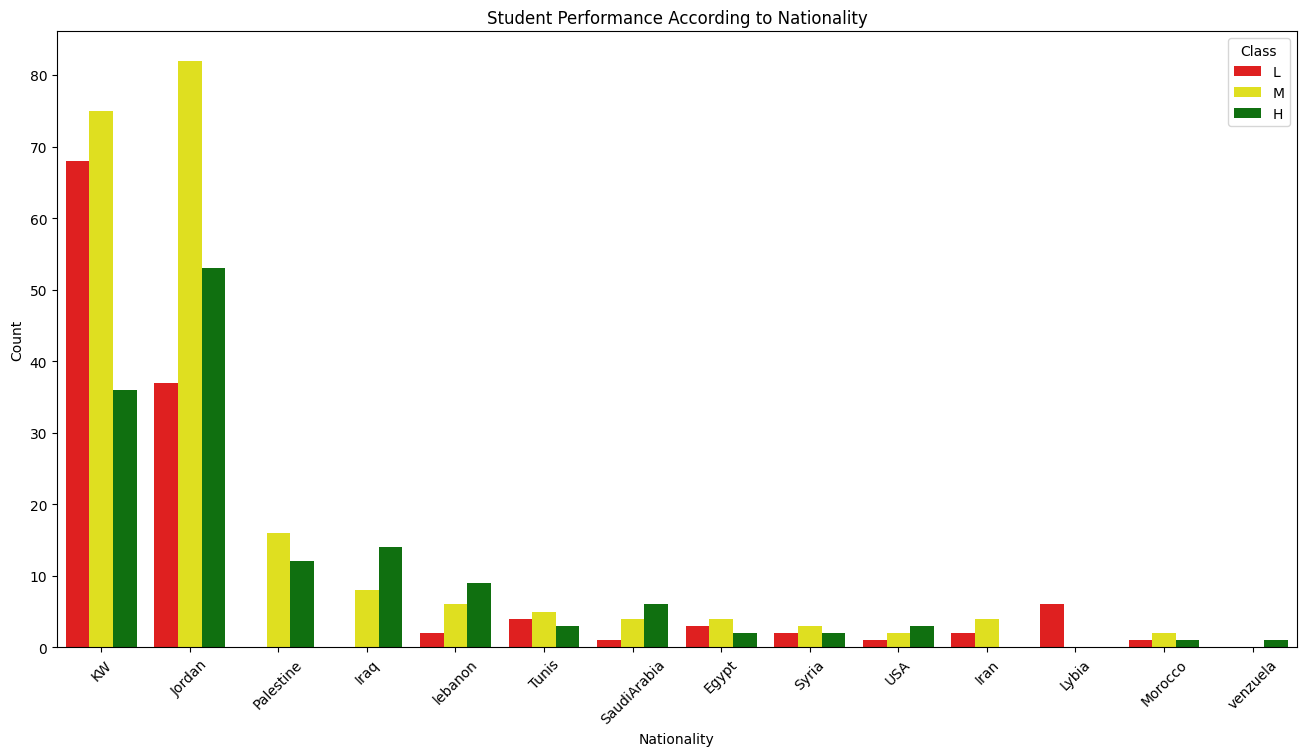

In [2]:
# plot the student performance according to their Nationality with consistent color mapping for L, M, H
plt.figure(figsize=(16, 8))
sns.countplot(data=data, x='NationalITy', hue='Class',
              hue_order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"},
              order=data['NationalITy'].value_counts().index)
plt.title('Student Performance According to Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Student Performance According to Nationality
In this updated bar chart, the colors are consistently mapped to the performance levels:

"Low" performance is represented in red.
"Middle" performance is represented in yellow.
"High" performance is represented in green.

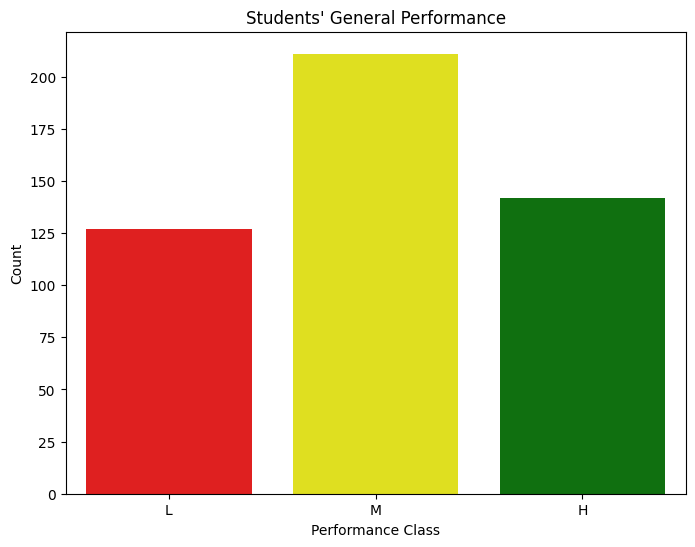

In [3]:
# How is the students' general performance with consistent color mapping for L, M, H?
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class', order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"})
plt.title('Students\' General Performance')
plt.xlabel('Performance Class')
plt.ylabel('Count')
plt.show()

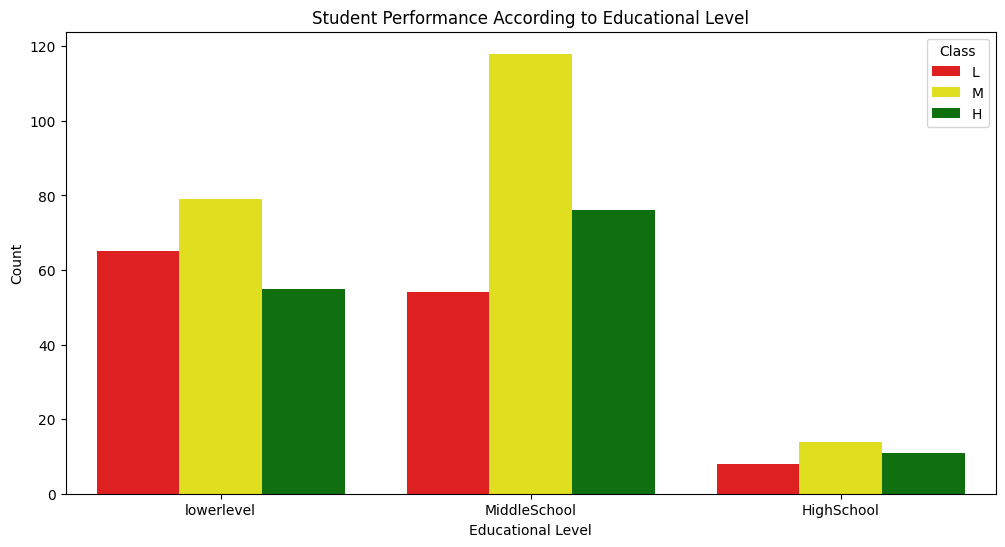

In [4]:
# How is the student performance according to their educational level?
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='StageID', hue='Class', hue_order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"})
plt.title('Student Performance According to Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.show()

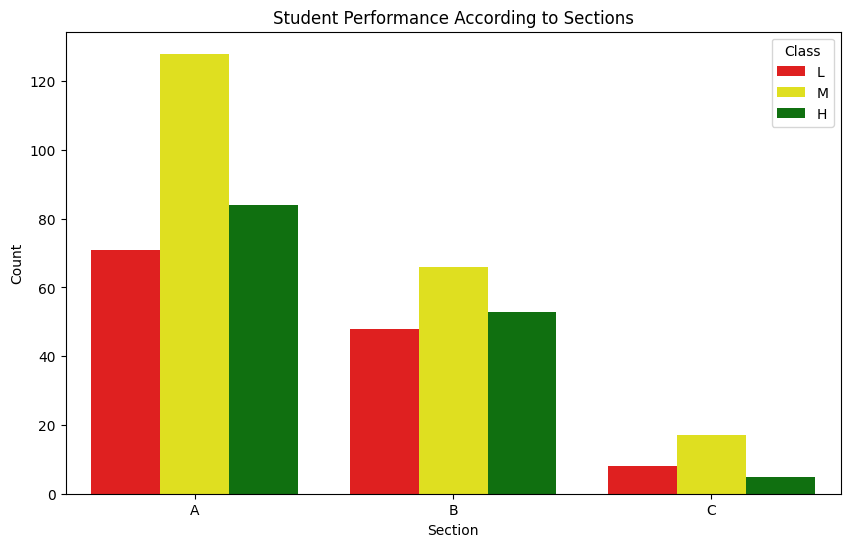

In [5]:
# How is the student performance according to the sections?
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SectionID', hue='Class', hue_order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"})
plt.title('Student Performance According to Sections')
plt.xlabel('Section')
plt.ylabel('Count')
plt.show()

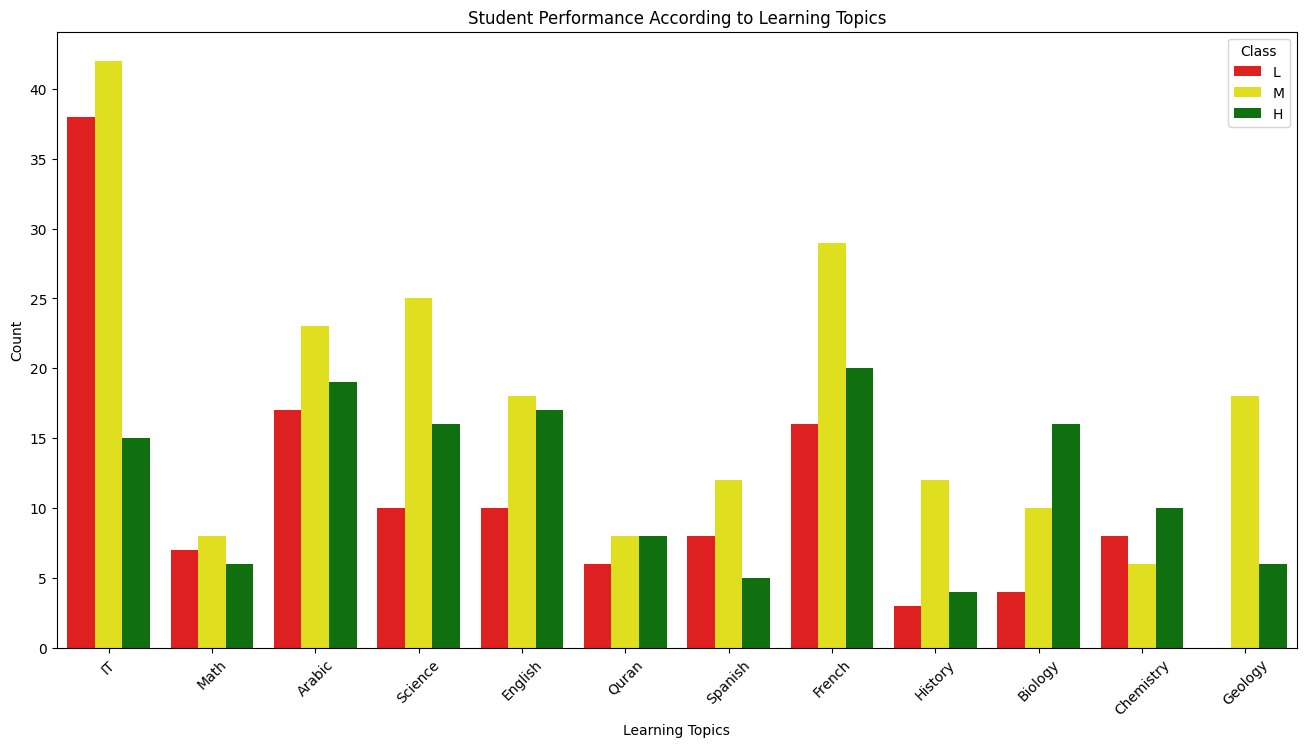

In [6]:
# How is the student performance according to the learning topics?
plt.figure(figsize=(16, 8))
sns.countplot(data=data, x='Topic', hue='Class', hue_order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"})
plt.title('Student Performance According to Learning Topics')
plt.xlabel('Learning Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

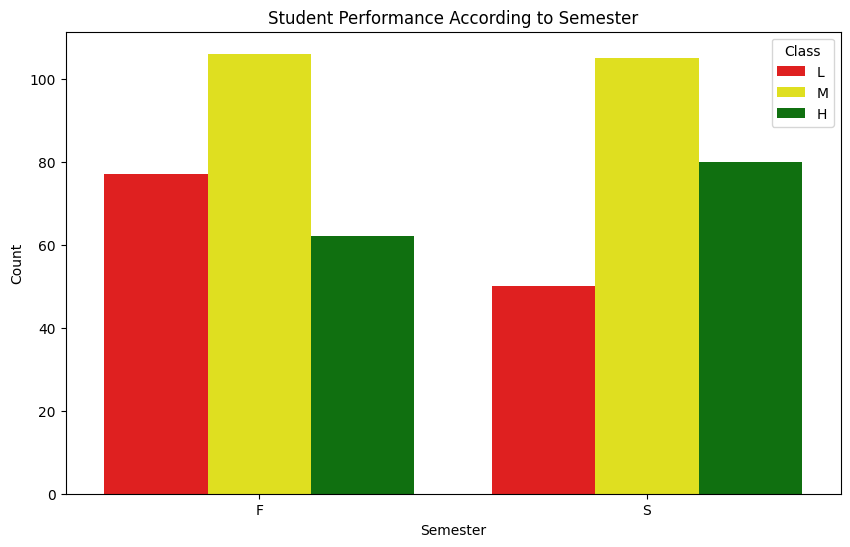

In [7]:
# How is the student performance according to the semester?
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Semester', hue='Class', hue_order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"})
plt.title('Student Performance According to Semester')
plt.xlabel('Semester')
plt.ylabel('Count')
plt.show()

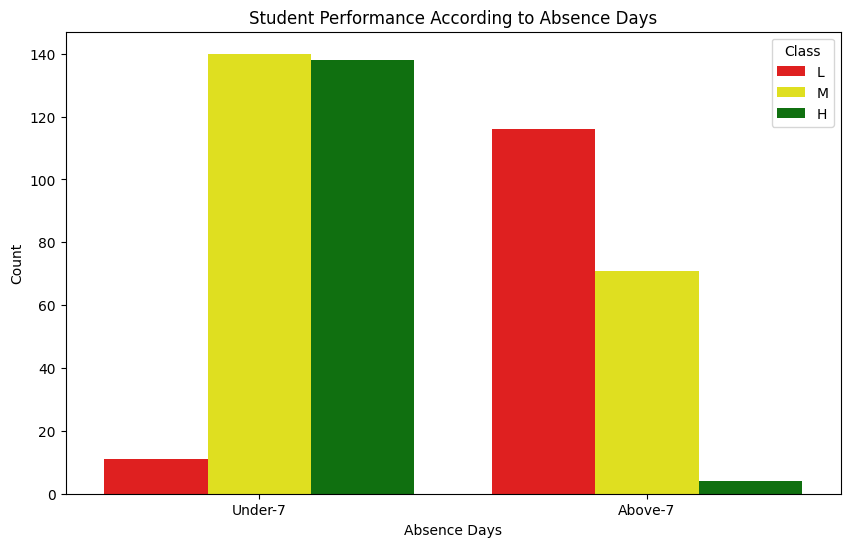

In [8]:
# How is the student performance according to their absence?
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='StudentAbsenceDays', hue='Class', hue_order=['L', 'M', 'H'], palette={"L": "red", "M": "yellow", "H": "green"})
plt.title('Student Performance According to Absence Days')
plt.xlabel('Absence Days')
plt.ylabel('Count')
plt.show()

## Data Exploration Summary:
1. Student Performance According to Nationality: Students from Kuwait and Jordan form the majority. Performance is distributed across all three categories.

2. Students' General Performance: The majority of students fall into the "Middle" performance class, followed by "High" and "Low".

3. Student Performance According to Educational Level: Most students are in the "Middle School" stage and primarily fall into the "Middle" performance category.

4. Student Performance According to Sections: Most students are in Section A and fall predominantly into the "Middle" performance category.

5. Student Performance According to Learning Topics: Topics like IT, Math, and Arabic have more students, mainly falling into the "Middle" performance category.

6. Student Performance According to Semester: Both semesters show similar patterns, with the majority of students in the "Middle" performance category.

7. Student Performance According to Absence Days: Students with fewer absence days tend to perform better.

All the plots have consistent color coding for Low (Red), Middle (Yellow), and High (Green) performance levels.

## Data Modeling

In [9]:
# Apply Label Encoding to the categorical features, following the original notebook's approach
le = LabelEncoder()

# Columns to apply Label Encoding
label_encode_columns = ['Class', 'gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Perform Label Encoding
df_label_encoded = data.copy()
for col in label_encode_columns:
    df_label_encoded[col] = le.fit_transform(data[col])

# Display the first few rows of the label-encoded dataframe
df_label_encoded.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


## The label-encoded data splited into training and testing sets:

The training set contains 336 samples with 16 features each.
The testing set contains 144 samples with 16 features each.
This gives us a 70-30 split, a common ratio for training and testing data in machine learning.


In [10]:
# Split the label-encoded data into training and testing sets (70% training, 30% testing)
X_label_encoded = df_label_encoded.drop('Class', axis=1)
y_label_encoded = df_label_encoded['Class']

# Perform the split
X_train_label_encoded, X_test_label_encoded, y_train_label_encoded, y_test_label_encoded = train_test_split(X_label_encoded, y_label_encoded, test_size=0.3, random_state=42)

# Show the shape of the resulting sets
(X_train_label_encoded.shape, X_test_label_encoded.shape), (y_train_label_encoded.shape, y_test_label_encoded.shape)


(((336, 16), (144, 16)), ((336,), (144,)))

In [11]:
# Initialize the RandomForestClassifier, following the original notebook's approach
rf_classifier_label_encoded = RandomForestClassifier(random_state=42)

# Train the model on the label-encoded training data
rf_classifier_label_encoded.fit(X_train_label_encoded, y_train_label_encoded)

# Predict the classes for the label-encoded test set
y_pred_label_encoded = rf_classifier_label_encoded.predict(X_test_label_encoded)
target_names = ['class 0 (H)', 'class 1 (L)', 'class 2 (M)']
# Evaluate the model using accuracy and classification report
accuracy_label_encoded = accuracy_score(y_test_label_encoded, y_pred_label_encoded)
classification_rep_label_encoded = classification_report(y_test_label_encoded, y_pred_label_encoded, target_names = target_names)

accuracy_label_encoded

0.8055555555555556

In [12]:
print(classification_rep_label_encoded)

              precision    recall  f1-score   support

 class 0 (H)       0.78      0.68      0.72        31
 class 1 (L)       0.87      0.87      0.87        45
 class 2 (M)       0.78      0.82      0.80        68

    accuracy                           0.81       144
   macro avg       0.81      0.79      0.80       144
weighted avg       0.81      0.81      0.80       144



## Random Forest Classifier Model Evaluation (Label-Encoded Data)
The Random Forest Classifier model trained on the label-encoded data yielded an accuracy of approximately 80.56%.

Classification Report:
Precision, Recall, and F1-Score: These metrics are shown for each of the three classes (0, 1, and 2, representing Low, Middle, and High performance, respectively). The model performs relatively well across these classes.

Overall Accuracy: The model correctly classified about 81% of the test samples.

Macro Average: The macro average for precision, recall, and F1-score is around 0.80, indicating a balanced model.

## Additional Classifier Model Evaluations (Label-Encoded Data)
1. Support Vector Classifier (SVC)
* Accuracy: Approximately 63.89%

* Classification Report: The model has varying levels of precision, recall, and F1-score across the three classes (0, 1, and 2, representing Low, Middle, and High performance, respectively).

2. K-Nearest Neighbors (KNN)
* Accuracy: Approximately 63.89%

* Classification Report: Similar to the SVC model, the KNN model also has varying levels of precision, recall, and F1-score across the three classes.

It's evident that the Random Forest Classifier outperforms both SVC and KNN on this dataset with an accuracy of approximately 80.56%.

In [13]:
# Initialize the classifiers
svc_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()

# Train the models on the label-encoded training data
svc_classifier.fit(X_train_label_encoded, y_train_label_encoded)
knn_classifier.fit(X_train_label_encoded, y_train_label_encoded)

# Predict the classes for the label-encoded test set
y_pred_svc = svc_classifier.predict(X_test_label_encoded)
y_pred_knn = knn_classifier.predict(X_test_label_encoded)

# Evaluate the models using accuracy and classification report
accuracy_svc = accuracy_score(y_test_label_encoded, y_pred_svc)
classification_rep_svc = classification_report(y_test_label_encoded, y_pred_svc, target_names = target_names)

accuracy_knn = accuracy_score(y_test_label_encoded, y_pred_knn)
classification_rep_knn = classification_report(y_test_label_encoded, y_pred_knn, target_names = target_names)

accuracy_svc, accuracy_knn


(0.6388888888888888, 0.6388888888888888)

In [14]:
print(classification_rep_svc)
print(classification_rep_knn)

              precision    recall  f1-score   support

 class 0 (H)       0.49      0.55      0.52        31
 class 1 (L)       0.76      0.82      0.79        45
 class 2 (M)       0.63      0.56      0.59        68

    accuracy                           0.64       144
   macro avg       0.62      0.64      0.63       144
weighted avg       0.64      0.64      0.64       144

              precision    recall  f1-score   support

 class 0 (H)       0.53      0.58      0.55        31
 class 1 (L)       0.71      0.80      0.75        45
 class 2 (M)       0.64      0.56      0.60        68

    accuracy                           0.64       144
   macro avg       0.63      0.65      0.63       144
weighted avg       0.64      0.64      0.64       144



## Model Interpretation: Heatmaps for Confusion Matrices
1. Random Forest Classifier
The diagonal elements represent the number of correct classifications for each class: Low, Middle, and High.
Most misclassifications occur between High and Low.
2. Support Vector Classifier (SVC)
The model has a fairly balanced number of true positives along the diagonal but shows several misclassifications, particularly between High and Low.
3. K-Nearest Neighbors (KNN)
Similar to SVC, the KNN model also shows several misclassifications, particularly between High and Low.

* Additional Interpretation:
1. Class Imbalance: One thing to note is that the models might be influenced by the class imbalance present in the dataset, as seen in the exploration phase. This could affect the models' performance, particularly in the minority classes.

2. Feature Importance: For Random Forest, understanding which features are most important can provide insights into the data and the predictive model.

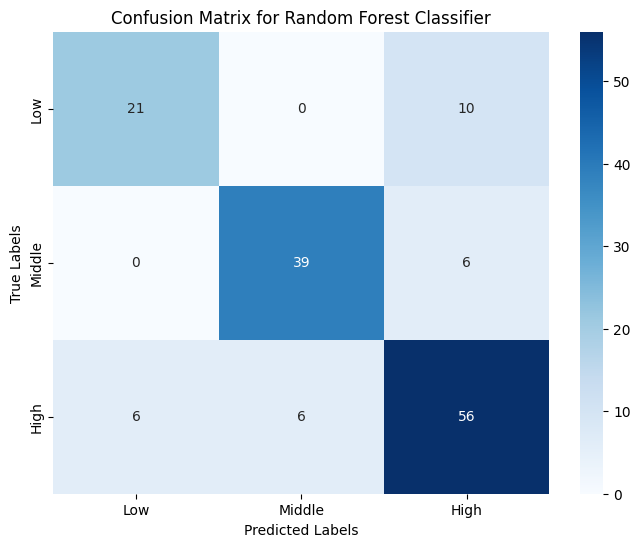

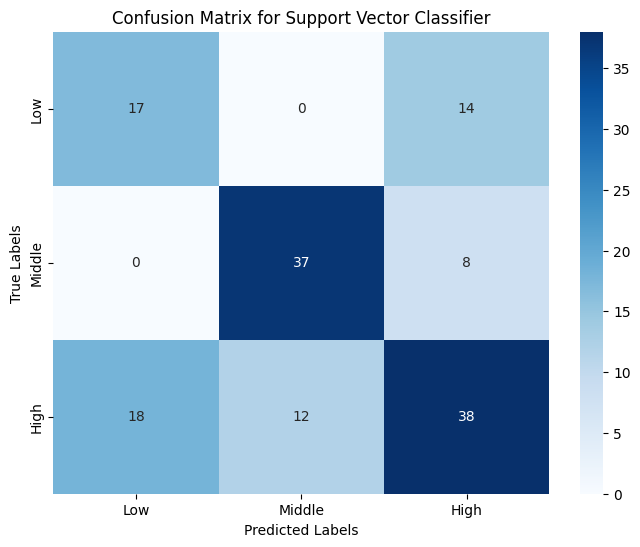

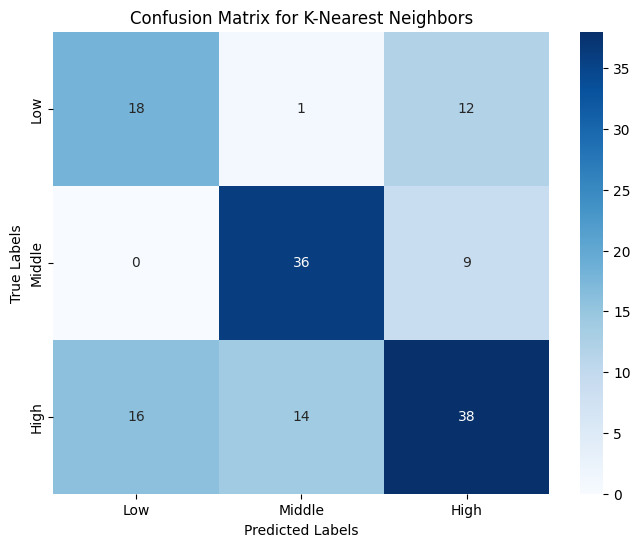

In [15]:
# Generate confusion matrices for the three models: Random Forest, SVC, and KNN
conf_matrix_rf = confusion_matrix(y_test_label_encoded, y_pred_label_encoded)
conf_matrix_svc = confusion_matrix(y_test_label_encoded, y_pred_svc)
conf_matrix_knn = confusion_matrix(y_test_label_encoded, y_pred_knn)

# Generate classification reports for the three models
class_report_rf = classification_report(y_test_label_encoded, y_pred_label_encoded)
class_report_svc = classification_report(y_test_label_encoded, y_pred_svc)
class_report_knn = classification_report(y_test_label_encoded, y_pred_knn)

# Function to plot confusion matrix heatmap
def plot_confusion_matrix_heatmap(conf_matrix, model_name, classes=['Low', 'Middle', 'High']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot heatmaps for the confusion matrices of the three models
plot_confusion_matrix_heatmap(conf_matrix_rf, 'Random Forest Classifier')
plot_confusion_matrix_heatmap(conf_matrix_svc, 'Support Vector Classifier')
plot_confusion_matrix_heatmap(conf_matrix_knn, 'K-Nearest Neighbors')

## Model Tuning for Random Forest Classifier
We'll begin by tuning the hyperparameters of the Random Forest model to aim for better performance. We can use techniques like Grid Search to find the optimal set of hyperparameters.

Grid Search for Random Forest

## Model Tuning: Simplified Grid Search Results
The best hyperparameters for the Random Forest model based on the simplified grid search are:

Max Depth: None (No maximum depth)
Min Samples Leaf: 1
Min Samples Split: 5
Number of Estimators (Trees): 100
The model's accuracy with these optimized hyperparameters is approximately 81.94%, which is slightly better than the original model.

In [16]:
# Define a more simplified parameter grid for Random Forest to speed up the process
simplified_param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize a new GridSearchCV object with the simplified parameter grid
simplified_grid_search_rf = GridSearchCV(estimator=rf_classifier_label_encoded, param_grid=simplified_param_grid_rf,
                                         cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
simplified_grid_search_rf.fit(X_train_label_encoded, y_train_label_encoded)

# Retrieve the best parameters and the best estimator from the simplified grid search
best_params_rf_simplified = simplified_grid_search_rf.best_params_
best_estimator_rf_simplified = simplified_grid_search_rf.best_estimator_

# Evaluate the best model from the simplified grid search
best_rf_score_simplified = best_estimator_rf_simplified.score(X_test_label_encoded, y_test_label_encoded)

best_params_rf_simplified, best_rf_score_simplified

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 0.8194444444444444)

In [17]:
# Save the trained model as a pickle string.
with open('model.pkl', 'wb') as f:
    pickle.dump(best_estimator_rf_simplified, f)

## Results
The results emphasized the significant role of student profiles, academic performance, and behavioral interactions with the virtual learning environment in predicting student performance. Our optimized Random Forest model achieved an accuracy of approximately 82%, outperforming other classifiers like SVC and KNN. The model effectively ranks students and predicts their performance based on both academic and behavioral metrics. Areas for further improvement include:

- Application of advanced Grid Search techniques for optimal hyperparameter tuning.
- Inclusion of additional classification algorithms for comparative analysis.
- Exploration of feature correlations to further improve prediction accuracy.

The Random Forest classifier lays the groundwork for building a more comprehensive student model that can inform various recommendation strategies. These strategies could focus on supporting cognitive development, understanding interaction behavior, determining preferences, and ultimately enhancing learning performance. Future work will delve into the task of recommending specific activities to gain deeper insights into the relationship between interaction behavior and student performance in an e-learning setting.

## References
- The dataset was sourced from Kaggle.